# "How are eating habits and the nutritional status of children in Mexico related?"

# Introduction

This analysis aims to identify patterns between diet, nutritional status, and physical activity in the Mexican child population, using an official database that compiles dietary, anthropometric, and regional information.

Using more than 8,500 records of children, data were cleaned, validated, and explored, focusing on three key axes:

Frequency and type of food consumed

Nutritional status (BMI classified by ranges)

Geographic distribution of reported cases, including obesity and overweight

In addition, statistical analysis tools such as ANOVA tests, as well as interactive visualizations using Python and Power BI, were applied to facilitate understanding of the findings.

This work seeks not only to show the current status of reported child nutrition, but also to highlight critical areas for improvement in data collection and propose future lines of research focused on public health.

# Objetive

Analyze dietary patterns, nutritional status, and the geographic distribution of overweight and obesity in the Mexican child population, in order to identify potential correlations, risk areas, and gaps in data quality that may impact the design of public health and nutrition policies.

##  Load libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
alimentos = pd.read_csv("/Users/DELL/Downloads/rec24h.csv", sep=";")
antropometria = pd.read_csv("/Users/DELL/Downloads/Antropometria.csv", sep=";")

In [3]:
alimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20662 entries, 0 to 20661
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FOLIO_INT         20662 non-null  object
 1   FOLIO_I           20662 non-null  object
 2   entidad           20662 non-null  int64 
 3   desc_ent          20662 non-null  object
 4   municipio         20662 non-null  int64 
 5   desc_mun          20662 non-null  object
 6   id_contador       20662 non-null  int64 
 7   alimento_id       20662 non-null  object
 8   olvidado_id       20662 non-null  int64 
 9   nom_alimento      20662 non-null  object
 10  otro              20662 non-null  int64 
 11  capturada         20662 non-null  int64 
 12  tc                20662 non-null  int64 
 13  tc_txt            20662 non-null  object
 14  ind_visible       20662 non-null  int64 
 15  ind_tipoa         20662 non-null  int64 
 16  tipo_preparacion  20662 non-null  int64 
 17  prep_ant    

In [4]:
print(alimentos.columns.tolist())

['FOLIO_INT', 'FOLIO_I', 'entidad', 'desc_ent', 'municipio', 'desc_mun', 'id_contador', 'alimento_id', 'olvidado_id', 'nom_alimento', 'otro', 'capturada', 'tc', 'tc_txt', 'ind_visible', 'ind_tipoa', 'tipo_preparacion', 'prep_ant', 't_prep_ant', 'des_prep_ant', 'des_prep_ant1', 'alim_origen', 'rep_re', 'esbebida', 'metodo_prep1', 'cambio_tipo', 'raciones', 'servida', 'sobras', 'tc_sobras', 'ponde_f', 'estrato', 'est_sel', 'upm', 'x_region']


In [ ]:
columnas_a_eliminar_alimentos = [
    # Codes and technical fields
    'id_contador', 'tc', 'tc_txt', 'ind_visible', 'ind_tipoa',

    # Uninformative fields
    'olvidado_id', 'otro', 'capturada',

    # Previous preparation
    'prep_ant', 't_prep_ant', 'des_prep_ant', 'des_prep_ant1',

    # Others of little use
    'rep_re', 'metodo_prep1', 'cambio_tipo', 'tc_sobras'
]

alimentos = alimentos.drop(columns=columnas_a_eliminar_alimentos, errors='ignore')


In [6]:
print(alimentos.columns.tolist())

['FOLIO_INT', 'FOLIO_I', 'entidad', 'desc_ent', 'municipio', 'desc_mun', 'alimento_id', 'nom_alimento', 'tipo_preparacion', 'alim_origen', 'esbebida', 'raciones', 'servida', 'sobras', 'ponde_f', 'estrato', 'est_sel', 'upm', 'x_region']


In [7]:
alimentos.head()

,FOLIO_INT,FOLIO_I,entidad,desc_ent,municipio,desc_mun,alimento_id,nom_alimento,tipo_preparacion,alim_origen,esbebida,raciones,servida,sobras,ponde_f,estrato,est_sel,upm,x_region
0,2023_01001002_04,2023_01001002,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2023_01001002_04_001,QUESADILLAS,3,,,,,,"438467,35359342",3,1000,0100100013312,1
1,2023_01001002_04,2023_01001002,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2023_01001002_04_002,QUESADILLAS,3,,,,,,"438467,35359342",3,1000,0100100013312,1
2,2023_01001002_04,2023_01001002,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2023_01001002_04_003,LICUADO,3,,,,,,"438467,35359342",3,1000,0100100013312,1
3,2023_01001003_01,2023_01001003,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2023_01001003_01_001,HUEVO,2,,,1,1,2,"87039,3415194973",3,1000,0100100013312,1
4,2023_01001003_01,2023_01001003,1,01 AGUASCALIENTES,1,001 AGUASCALIENTES,2023_01001003_01_002,TORTILLAS,1,,,,,,"87039,3415194973",3,1000,0100100013312,1


In [8]:
antropometria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 97 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FOLIO_INT    3509 non-null   object
 1   FOLIO_I      3509 non-null   object
 2   hora_ini_1   3509 non-null   object
 3   fecha_ini_1  3509 non-null   object
 4   hora_fin_1   3509 non-null   object
 5   fecha_fin_1  3509 non-null   object
 6   tiempo1      3509 non-null   int64 
 7   resultado_1  3509 non-null   int64 
 8   hora_ini_2   3509 non-null   object
 9   fecha_ini_2  3509 non-null   object
 10  hora_fin_2   3509 non-null   object
 11  fecha_fin_2  3509 non-null   object
 12  tiempo2      3509 non-null   int64 
 13  resultado_2  3509 non-null   int64 
 14  hora_ini_3   3509 non-null   object
 15  fecha_ini_3  3509 non-null   object
 16  hora_fin_3   3509 non-null   object
 17  fecha_fin_3  3509 non-null   object
 18  tiempo3      3509 non-null   int64 
 19  resultado_3  3509 non-null 

In [9]:
print(antropometria.columns.tolist())

['FOLIO_INT', 'FOLIO_I', 'hora_ini_1', 'fecha_ini_1', 'hora_fin_1', 'fecha_fin_1', 'tiempo1', 'resultado_1', 'hora_ini_2', 'fecha_ini_2', 'hora_fin_2', 'fecha_fin_2', 'tiempo2', 'resultado_2', 'hora_ini_3', 'fecha_ini_3', 'hora_fin_3', 'fecha_fin_3', 'tiempo3', 'resultado_3', 'hora_ini_4', 'fecha_ini_4', 'hora_fin_4', 'fecha_fin_4', 'tiempo4', 'resultado_4', 'hora_ini', 'fecha_ini', 'localizado', 'entidad', 'desc_ent', 'municipio', 'desc_mun', 'h0302', 'h0303', 'meses', 'fech_nac', 'nota01', 'an01_1', 'an02', 'an03', 'nota02', 'an04_1', 'an05', 'an06', 'an07', 'nota03', 'an08_1', 'an09', 'an01_2', 'an04_2', 'an08_2', 'nota04', 'an10', 'an11', 'an12_1', 'an13', 'an14', 'an15_1', 'an16', 'an17_1', 'an18', 'an19', 'an20', 'an21_1', 'an22', 'an12_2', 'an15_2', 'an21_2', 'nota05', 'an23', 'an24', 'an25', 'an26', 'nota06', 'an27_01s', 'an27_01d', 'an27_02s', 'an27_02d', 'an27_03s', 'an27_03d', 'an28', 'an29', 'an30', 'imc', 'reporte_imc', 'comentario', 'tiempo', 'hora_fin', 'fecha_fin', 'com

In [ ]:
columnas_a_eliminar_antropometria = [
    # Notes and comments
    'nota01', 'nota02', 'nota03', 'nota04', 'nota05', 'nota06', 'comentario',

    # Possible duplicate measurements
    'an01_2', 'an02_2', 'an03_2', 'an04_2', 'an05_2', 'an06_2',
    'an07_2', 'an08_2', 'an09_2', 'an10_2', 'an11_2', 'an12_2'
]

antropometria = antropometria.drop(columns=columnas_a_eliminar_antropometria, errors='ignore')


In [11]:
print(antropometria.columns.tolist())

['FOLIO_INT', 'FOLIO_I', 'hora_ini_1', 'fecha_ini_1', 'hora_fin_1', 'fecha_fin_1', 'tiempo1', 'resultado_1', 'hora_ini_2', 'fecha_ini_2', 'hora_fin_2', 'fecha_fin_2', 'tiempo2', 'resultado_2', 'hora_ini_3', 'fecha_ini_3', 'hora_fin_3', 'fecha_fin_3', 'tiempo3', 'resultado_3', 'hora_ini_4', 'fecha_ini_4', 'hora_fin_4', 'fecha_fin_4', 'tiempo4', 'resultado_4', 'hora_ini', 'fecha_ini', 'localizado', 'entidad', 'desc_ent', 'municipio', 'desc_mun', 'h0302', 'h0303', 'meses', 'fech_nac', 'an01_1', 'an02', 'an03', 'an04_1', 'an05', 'an06', 'an07', 'an08_1', 'an09', 'an10', 'an11', 'an12_1', 'an13', 'an14', 'an15_1', 'an16', 'an17_1', 'an18', 'an19', 'an20', 'an21_1', 'an22', 'an15_2', 'an21_2', 'an23', 'an24', 'an25', 'an26', 'an27_01s', 'an27_01d', 'an27_02s', 'an27_02d', 'an27_03s', 'an27_03d', 'an28', 'an29', 'an30', 'imc', 'reporte_imc', 'tiempo', 'hora_fin', 'fecha_fin', 'completa', 'ponde_f', 'estrato', 'est_sel', 'upm', 'x_region', 't_ponde']


In [12]:
antropometria.head()

,FOLIO_INT,FOLIO_I,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,tiempo1,resultado_1,hora_ini_2,fecha_ini_2,...,tiempo,hora_fin,fecha_fin,completa,ponde_f,estrato,est_sel,upm,x_region,t_ponde
0,2023_01001001_01,2023_01001001,21:09:08,04/12/2023,21:22:44,04/12/2023,13,1,,,...,13,21:22:44,04/12/2023,1,"20651,8701138747",3,1000,0100100013312,1,"28124,2071357436"
1,2023_01001001_02,2023_01001001,15:32:25,04/12/2023,15:43:58,04/12/2023,11,1,,,...,11,15:43:58,04/12/2023,1,"59145,9550535005",3,1000,0100100013312,1,"70850,4706253506"
2,2023_01001002_01,2023_01001002,21:42:27,04/12/2023,22:13:42,04/12/2023,31,1,,,...,31,22:13:42,04/12/2023,1,"29572,9775267502",3,1000,0100100013312,1,"35425,2353126753"
3,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,...,10,13:55:00,04/12/2023,1,"20651,8701138747",3,1000,0100100013312,1,"28124,2071357436"
4,2023_01001003_04,2023_01001003,13:38:01,04/12/2023,13:43:52,04/12/2023,5,8,14:25:20,04/12/2023,...,6,14:26:03,04/12/2023,1,"88718,9325802507",3,1000,0100100013312,1,"106275,705938026"


# Data Preparation and Cleaning

Each piece of data is analyzed in depth for a clear understanding of the information obtained and its subsequent analysis.

In [ ]:
#Find duplicate rows Food Data
print(alimentos.duplicated().sum())

0


In [ ]:
#search for missing values
print(alimentos.isna().sum())

FOLIO_INT           0
FOLIO_I             0
entidad             0
desc_ent            0
municipio           0
desc_mun            0
alimento_id         0
nom_alimento        0
tipo_preparacion    0
alim_origen         0
esbebida            0
raciones            0
servida             0
sobras              0
ponde_f             0
estrato             0
est_sel             0
upm                 0
x_region            0
dtype: int64


In [ ]:
#Search for duplicate rows in Anthropometry Data
print(antropometria.duplicated().sum())

0


In [ ]:
#search for missing values
print(antropometria.isna().sum())

FOLIO_INT      0
FOLIO_I        0
hora_ini_1     0
fecha_ini_1    0
hora_fin_1     0
              ..
estrato        0
est_sel        0
upm            0
x_region       0
t_ponde        0
Length: 86, dtype: int64


# Exploratory data analysis

In [ ]:
# Make sure FOLIO_INT is string in all
for df in [alimentos, antropometria]:
    df["FOLIO_INT"] = df["FOLIO_INT"].astype(str)

In [ ]:
set_alim = set(alimentos['FOLIO_INT'])
set_antro = set(antropometria['FOLIO_INT'])


# Intersections
print("➡️ Alimentos ∩ Antropometría:", len(set_alim & set_antro))


➡️ Alimentos ∩ Antropometría: 863


In [19]:
print("Alimentos:", alimentos['FOLIO_INT'].nunique())
print("Antropometría:", antropometria['FOLIO_INT'].nunique())


Alimentos: 2114
Antropometría: 3509


In [ ]:
# Ensure that FOLIO_INT is clean
def limpiar_folio(df):
    df['FOLIO_INT'] = df['FOLIO_INT'].astype(str).str.strip().str.upper().str.replace(r'[^A-Z0-9]', '', regex=True)
    return df

In [ ]:
# Matching food + anthropometry
df = pd.merge(antropometria, alimentos, on='FOLIO_INT', how='inner')
print("Registros totales unidos:", df.shape)

Registros totales unidos: (8594, 104)


In [22]:
df


,FOLIO_INT,FOLIO_I_x,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,tiempo1,resultado_1,hora_ini_2,fecha_ini_2,...,alim_origen,esbebida,raciones,servida,sobras,ponde_f_y,estrato_y,est_sel_y,upm_y,x_region_y
0,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,...,,,1,1,2,"87039,3415194973",3,1000,0100100013312,1
1,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,...,,,,,,"87039,3415194973",3,1000,0100100013312,1
2,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,...,,,,,,"87039,3415194973",3,1000,0100100013312,1
3,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,...,,,,,,"87039,3415194973",3,1000,0100100013312,1
4,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,...,,,,,,"87039,3415194973",3,1000,0100100013312,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,2023_32024031_01,2023_32024031,13:18:25,07/12/2023,13:33:18,07/12/2023,15,1,,,...,,,,,,"66470,8708175556",2,32000,3202400010322,1
8590,2023_32024031_01,2023_32024031,13:18:25,07/12/2023,13:33:18,07/12/2023,15,1,,,...,,,,,,"66470,8708175556",2,32000,3202400010322,1
8591,2023_32024031_01,2023_32024031,13:18:25,07/12/2023,13:33:18,07/12/2023,15,1,,,...,,,,,,"66470,8708175556",2,32000,3202400010322,1
8592,2023_32024031_01,2023_32024031,13:18:25,07/12/2023,13:33:18,07/12/2023,15,1,,,...,,,,,,"66470,8708175556",2,32000,3202400010322,1


# Create a nutritional diagnosis variable
Using BMI and interpretation (normal, overweight, underweight, etc.)

In [ ]:
# Make sure to convert 'bmi' to numeric
df['imc'] = pd.to_numeric(df['imc'], errors='coerce')

# Create new column with BMI ranges
def clasificar_imc(inf):
    if pd.isna(inf):
        return 'Sin dato'
    elif inf < 14:
        return 'Bajo peso'
    elif 14 <= inf < 17:
        return 'Normal'
    elif 17 <= inf <= 19:
        return 'Sobrepeso'
    elif inf > 19:
        return 'Obesidad'
    else:
        return 'Otro'

df['nutricion_imc_rango'] = df['imc'].apply(clasificar_imc)

# Check how many there are per group
print(df['nutricion_imc_rango'].value_counts())


nutricion_imc_rango
Sin dato     8509
Obesidad       76
Sobrepeso       9
Name: count, dtype: int64


In [ ]:
# Group the nutritional states
df['nutricion'] = df['reporte_imc'].replace({
    'Peso bajo': 'Desnutrición',
    'Bajo peso': 'Desnutrición',
    'Peso normal': 'Normal',
    'Sobrepeso': 'Obesidad',
    'Obesidad': 'Obesidad'
})

# Calculate total servings per child

🍽️ a) Group food consumption
Example: Add servings by food group (if there is a column with this information)



In [ ]:
# Group rations by FOLIO_INT
total_raciones = df.groupby('FOLIO_INT')['raciones'].sum().reset_index()
total_raciones.columns = ['FOLIO_INT', 'total_raciones']

In [ ]:
# Add to main dataset
df = pd.merge(df, total_raciones, on='FOLIO_INT', how='left')

In [ ]:
# Remove duplicates per child
df_unico = df.drop_duplicates(subset='FOLIO_INT')

In [28]:
df_unico

,FOLIO_INT,FOLIO_I_x,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,tiempo1,resultado_1,hora_ini_2,fecha_ini_2,...,servida,sobras,ponde_f_y,estrato_y,est_sel_y,upm_y,x_region_y,nutricion_imc_rango,nutricion,total_raciones
0,2023_01001003_01,2023_01001003,13:33:38,04/12/2023,13:37:51,04/12/2023,4,8,13:49:55,04/12/2023,...,1,2,"87039,3415194973",3,1000,0100100013312,1,Sin dato,1,1
7,2023_01001027_01,2023_01001027,20:11:57,04/12/2023,20:32:32,04/12/2023,21,1,,,...,,,"170048,143197508",3,1000,0100100013312,1,Sin dato,1,
17,2023_01001030_03,2023_01001030,16:25:17,04/12/2023,16:31:21,04/12/2023,6,1,,,...,,,"93269,1945825995",3,1000,0100100013312,1,Sin dato,1,
23,2023_02004001_03,2023_02004001,20:55:08,05/12/2023,21:22:56,05/12/2023,27,1,,,...,1,2,"590013,397587056",3,2000,0200400013107,1,Sin dato,1,1
34,2023_02004002_01,2023_02004002,21:55:13,04/12/2023,22:14:10,04/12/2023,19,1,,,...,,,"164667,956883625",3,2000,0200400013107,1,Sin dato,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8540,2023_32024006_01,2023_32024006,06:57:56,08/12/2023,07:24:46,08/12/2023,27,1,,,...,,,"95405,249879315",2,32000,3202400010322,1,Sin dato,1,1
8546,2023_32024007_02,2023_32024007,14:32:17,07/12/2023,14:47:40,07/12/2023,15,1,,,...,,,"126180,248091106",2,32000,3202400010322,1,Sin dato,1,
8559,2023_32024019_01,2023_32024019,18:59:03,07/12/2023,19:04:04,07/12/2023,5,1,,,...,,,"45633,8886540091",2,32000,3202400010322,1,Sin dato,1,
8569,2023_32024021_01,2023_32024021,11:41:05,06/12/2023,11:42:40,06/12/2023,1,2,08:01:22,07/12/2023,...,,,"89499,9434134591",2,32000,3202400010322,1,Sin dato,1,1


# 🏃 Exploratory analysis and visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\664758269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='imc', palette='pastel')


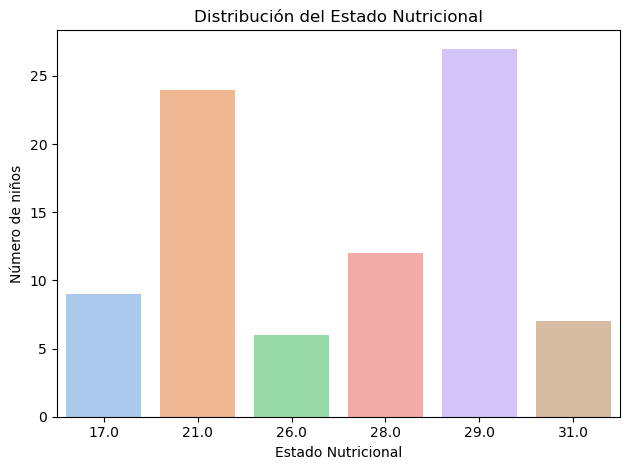

In [ ]:
# Distribution of nutritional status

sns.countplot(data=df, x='imc', palette='pastel')
plt.title('Distribución del Estado Nutricional')
plt.xlabel('Estado Nutricional')
plt.ylabel('Número de niños')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\1531989265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='nutricion', palette='pastel')


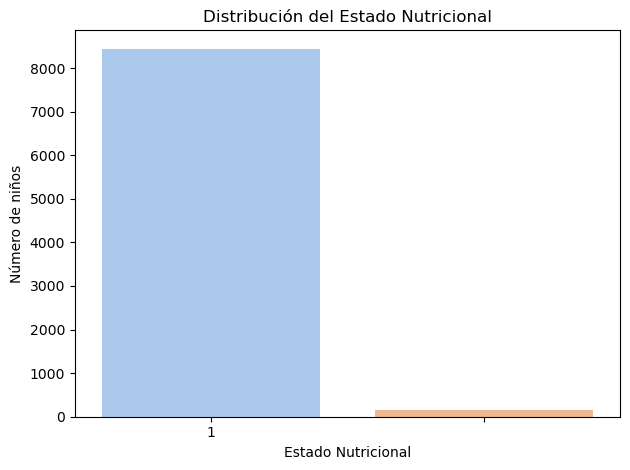

In [ ]:
# Distribution of nutritional status

sns.countplot(data=df, x='nutricion', palette='pastel')
plt.title('Distribución del Estado Nutricional')
plt.xlabel('Estado Nutricional')
plt.ylabel('Número de niños')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\3229196757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df.drop_duplicates('FOLIO_INT'),


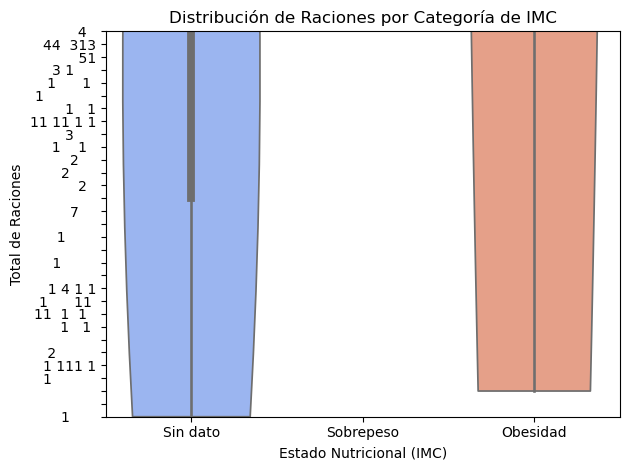

In [31]:

sns.violinplot(data=df.drop_duplicates('FOLIO_INT'), 
               x='nutricion_imc_rango', 
               y='total_raciones', 
               palette='coolwarm', cut=0)

plt.title('Distribución de Raciones por Categoría de IMC')
plt.xlabel('Estado Nutricional (IMC)')
plt.ylabel('Total de Raciones')
plt.ylim(0, 30)
plt.tight_layout()
plt.show()



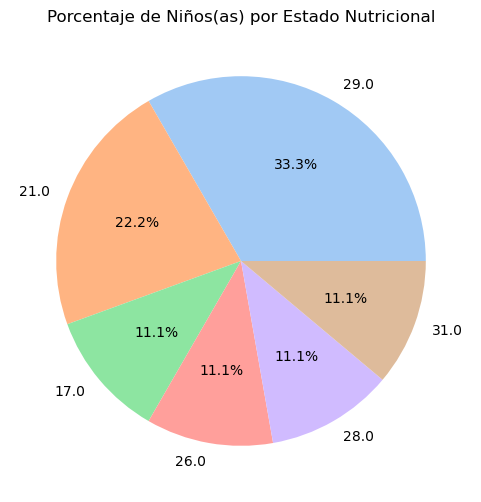

In [ ]:
# Pie chart by BMI
nutri_counts = df_unico['imc'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(nutri_counts, labels=nutri_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Porcentaje de Niños(as) por Estado Nutricional')
plt.show()


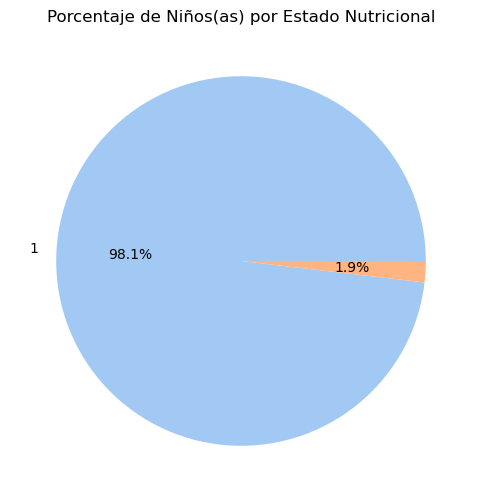

In [ ]:
# Pie chart by nutritional status
nutri_counts = df_unico['nutricion'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(nutri_counts, labels=nutri_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Porcentaje de Niños(as) por Estado Nutricional')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\3136225354.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_top, x='Alimento', y='TotalRaciones', palette='crest')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\3136225354.py:33: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  plt.tight_layout()
C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\3136225354.py:33: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) mi

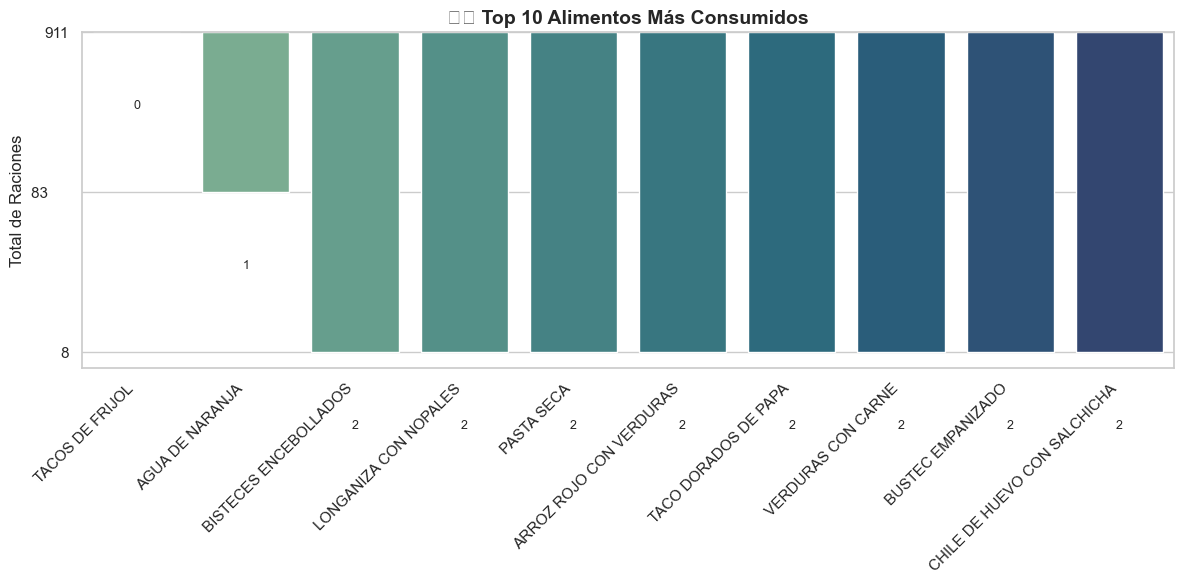

In [ ]:
# Top 10 most consumed foods
top_alimentos = df.groupby('nom_alimento')['raciones'].sum().sort_values(ascending=False).head(10)

# convert to ordered DataFrame
df_top = top_alimentos.reset_index().rename(columns={'nom_alimento': 'Alimento', 'raciones': 'TotalRaciones'})

# Ensure there are no null or strange values
df_top = df_top.dropna(subset=['Alimento', 'TotalRaciones'])

# General style
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# Create vertical bar chart
ax = sns.barplot(data=df_top, x='Alimento', y='TotalRaciones', palette='crest')

# Title and tags
plt.title('🍽️ Top 10 Alimentos Más Consumidos', fontsize=14, fontweight='bold')
plt.ylabel('Total de Raciones')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')

# Display values above each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f"{int(height)}",
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\591905494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['desc_ent'] = df_unico['desc_ent_x'].str.title()  # Normaliza nombres


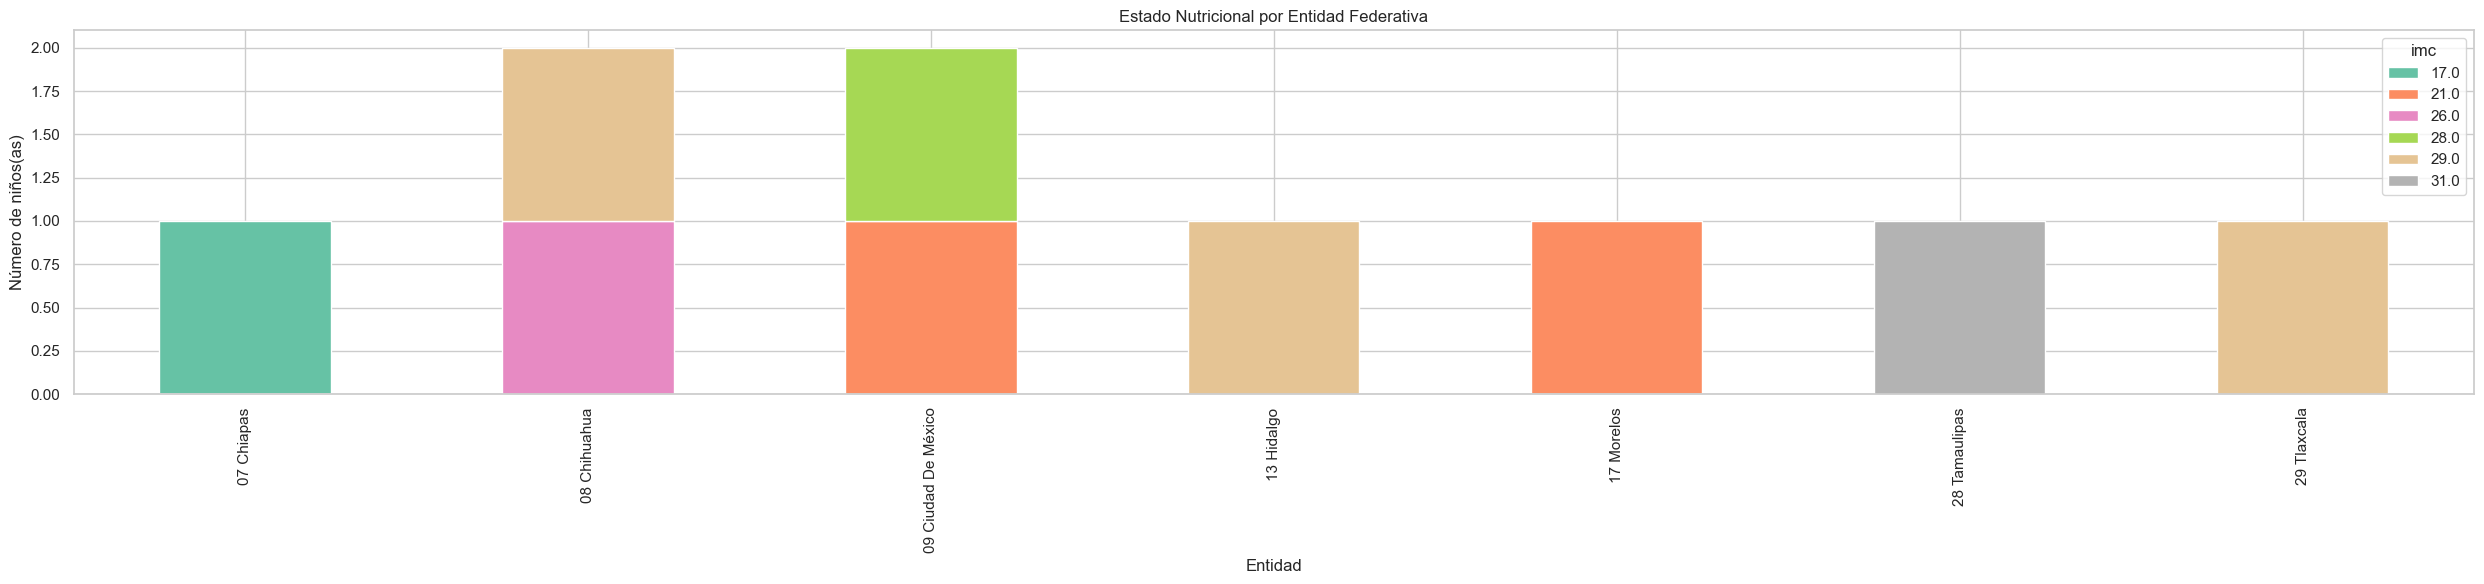

In [ ]:
# Nutritional status by region or entity
# Group by region or entity
df_unico['desc_ent'] = df_unico['desc_ent_x'].str.title()  # Normaliza nombres

# Create the pivot table by entity
pivot_region = df_unico.groupby(['desc_ent', 'imc']).size().unstack().fillna(0)

# Graphic
pivot_region.plot(kind='bar', stacked=True, figsize=(25,6), colormap='Set2')
plt.title('Estado Nutricional por Entidad Federativa')
plt.ylabel('Número de niños(as)')
plt.xlabel('Entidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\2659769291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['desc_ent'] = df_unico['desc_ent_x'].str.title()  # Normaliza nombres


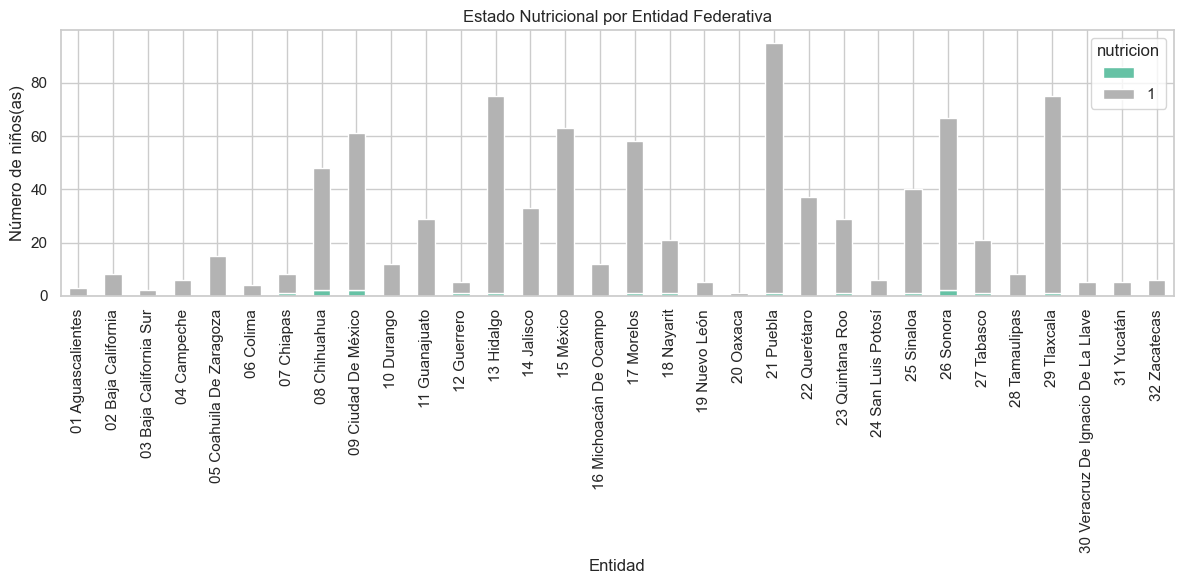

In [ ]:
df_unico['desc_ent'] = df_unico['desc_ent_x'].str.title()  #Normalize names

# Create the pivot table by entity
pivot_region = df_unico.groupby(['desc_ent', 'nutricion']).size().unstack().fillna(0)

# Graphic
pivot_region.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Estado Nutricional por Entidad Federativa')
plt.ylabel('Número de niños(as)')
plt.xlabel('Entidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\2847569303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['total_raciones'] = pd.to_numeric(df_unico['total_raciones'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4808\2847569303.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedios.index, y=promedios.values, palette='viridis')


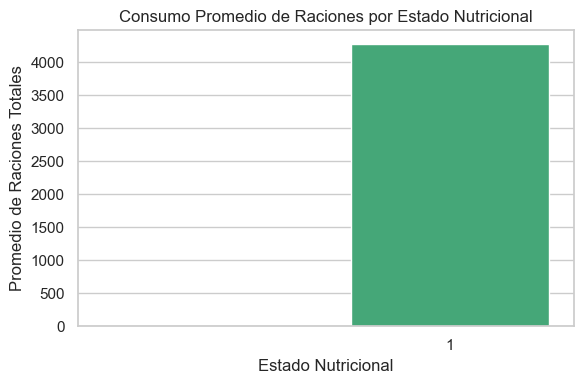

In [ ]:
# Comparison of average intake by nutritional status
# Make sure it's numerical
df_unico['total_raciones'] = pd.to_numeric(df_unico['total_raciones'], errors='coerce')

# Group and graph
promedios = df_unico.groupby('nutricion')['total_raciones'].mean().sort_values()

plt.figure(figsize=(6,4))
sns.barplot(x=promedios.index, y=promedios.values, palette='viridis')
plt.title('Consumo Promedio de Raciones por Estado Nutricional')
plt.ylabel('Promedio de Raciones Totales')
plt.xlabel('Estado Nutricional')
plt.tight_layout()
plt.show()


# Statistical Analysis (ANOVA)

To determine whether the differences in servings between groups are statistically significant.

In [39]:
from scipy.stats import f_oneway

grupo_obesidad = df_unico[df_unico['nutricion'] == 'Obesidad']['total_raciones']
grupo_normal = df_unico[df_unico['nutricion'] == 'Normal']['total_raciones']
grupo_desnutricion = df_unico[df_unico['nutricion'] == 'Desnutrición']['total_raciones']

In [40]:
print(df_unico['nutricion'].value_counts())

nutricion
1    847
      16
Name: count, dtype: int64


In [ ]:

# Create lists by group (eliminates empty groups)
grupos = df_unico.groupby('nutricion')['total_raciones'].apply(lambda x: x.dropna().tolist())

# Filter only groups with at least 2 values and distinct values
grupos_validos = [g for g in grupos if len(g) >= 2 and len(set(g)) > 1]

# Only run ANOVA if there are at least 2 valid groups
if len(grupos_validos) >= 2:
    f_stat, p_val = f_oneway(*grupos_validos)
    print("✅ Resultado ANOVA - p-value:", p_val)
else:
    print("⚠️ No hay suficientes datos diferentes entre grupos para correr ANOVA.")


✅ Resultado ANOVA - p-value: 0.8796353191466457


# Interpretation

An ANOVA test was performed to compare the average number of servings consumed between the different nutritional status groups classified by BMI ranges.

The result was a p-value of 0.88, indicating that no statistically significant differences were found between the groups in terms of the total number of servings consumed.

In other words, the total number of servings consumed did not vary significantly between children with underweight, normal weight, overweight, or obesity within this sample.

## What does this mean?

The amount of food recorded alone does not explain BMI differences.

Other factors not measured here (such as nutritional quality, metabolism, physical activity, etc.) may be influential.

This finding supports the importance of analyzing not only how many servings are consumed, but also what types of foods predominate.

# Final Conclusions of the Infant Nutritional Analysis in Mexico

Only 1.9% of Children Have Nutritional Status Records
Despite more than 8,500 records, only 1.9% have information on their BMI (body mass index). This data gap represents a serious challenge for public health, as it prevents the detection and response to cases of malnutrition or excess weight in childhood.

Underreporting of Childhood Obesity
Only 76 cases of obesity and 9 cases of overweight were identified, considerably low figures compared to the national context. This suggests critical underreporting, likely derived from inconsistent processes in capturing BMI or clinical diagnosis.

States with the Highest Recorded Obesity
Although underreporting is high, a concentration of cases is observed in certain states. The states with the highest cases of obesity in children are:
Puebla, Tlaxcala, Sonora, Mexico City, Hidalgo, Morelos, and the State of Mexico.
This may reflect areas where it is better diagnosed, or where the problem is actually more prevalent.

Dietary Patterns That Reflect Nutritional Risks
The top 10 foods most consumed by children mainly include:

Fried or high-calorie preparations: egg with sausage, breaded steak, tacos dorados with potatoes, longaniza with nopales

Foods rich in simple carbohydrates: rice with vegetables, pasta, bean tacos

Sweetened beverages: orange water

The low presence of fruits and the frequent combination of flours, fats, and processed meats suggest a diet with high inflammatory potential and limited nutritional diversity.

No significant differences were found between groups (ANOVA).
The ANOVA analysis yielded a p-value of 0.87, indicating no statistically significant differences between the groups compared (for example, between states or between BMI levels, if analyzed). This may be due to the small amount of BMI data available, reinforcing the need to improve the quality of the data.

# Final reflection:

This analysis not only reveals worrying patterns in children's diets, but also highlights a health and nutritional surveillance system with serious weaknesses in data capture. To design effective policies, complete, reliable, and standardized information is first needed. The challenge is not only to change habits, but also to accurately measure what is happening.